In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


[link text](https:// [link text](https:// that i need---python


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [11]:
from google.colab import drive
drive.mount('/content/drive') # Mount to /content/drive

import pandas as pd

# Correct file path after mounting to /content/drive
url = "/content/drive/MyDrive/engagement .csv"

# Check if the file exists
import os
if os.path.exists(url):
  df = pd.read_csv(url)  # This line defines the 'df' DataFrame
  print("DataFrame 'df' has been created.")
else:
  print(f"File not found at: {url}")
  # Print the contents of your Google Drive to help find the correct path
  !ls "/content/drive/MyDrive/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
DataFrame 'df' has been created.


In [13]:
# Display the first 10 rows of the dataset
print(df.head(5))

              course_title  student_id  course_rating  engagement_quizzes  \
0  Introduction to Tableau    274999.0            4.0                12.0   
1  Introduction to Tableau    274501.0            5.0                 2.0   
2  Introduction to Tableau    272842.0            4.0                13.0   
3  Introduction to Tableau    275173.0            5.0                15.0   
4  Introduction to Tableau    274876.0            3.0                 7.0   

   engagement_lessons  engagement_exams  
0                23.0              23.0  
1                34.0              23.0  
2                12.0              45.0  
3                23.0              67.0  
4                67.0              89.0  


Reshaping the data is crucial for effective machine learning model training. It helps in creating a more structured and informative dataset, which can lead to better model performance.

In [14]:
import pandas as pd

# Assuming 'df' is your already loaded DataFrame
# Display the original data for reference
print("Original Data:")
print(df)  # Changed 'data' to 'df'

# Reshape the data
reshaped_data = df.groupby('student_id').agg({  # Changed 'data' to 'df'
    'course_rating': 'mean',  # Average course rating
    'engagement_quizzes': 'mean',  # Average engagement quizzes
    'engagement_lessons': 'mean',  # Average engagement lessons
    'engagement_exams': 'mean'  # Average engagement exams
}).reset_index()

# Display the reshaped data
print("\nReshaped Data:")
print(reshaped_data)

Original Data:
                      course_title  student_id  course_rating  \
0          Introduction to Tableau    274999.0            4.0   
1          Introduction to Tableau    274501.0            5.0   
2          Introduction to Tableau    272842.0            4.0   
3          Introduction to Tableau    275173.0            5.0   
4          Introduction to Tableau    274876.0            3.0   
..                             ...         ...            ...   
137  Introduction to R Programming    258800.0            3.0   
138  Introduction to R Programming    258800.0            5.0   
139  Introduction to R Programming    258800.0            3.0   
140  Introduction to R Programming    258800.0            5.0   
141  Introduction to R Programming    258803.0            4.0   

     engagement_quizzes  engagement_lessons  engagement_exams  
0                  12.0                23.0              23.0  
1                   2.0                34.0              23.0  
2           

Lets now visualisaze our data. Data visualization is a powerful tool that can help you uncover hidden patterns, trends, and anomalies within your dataset.

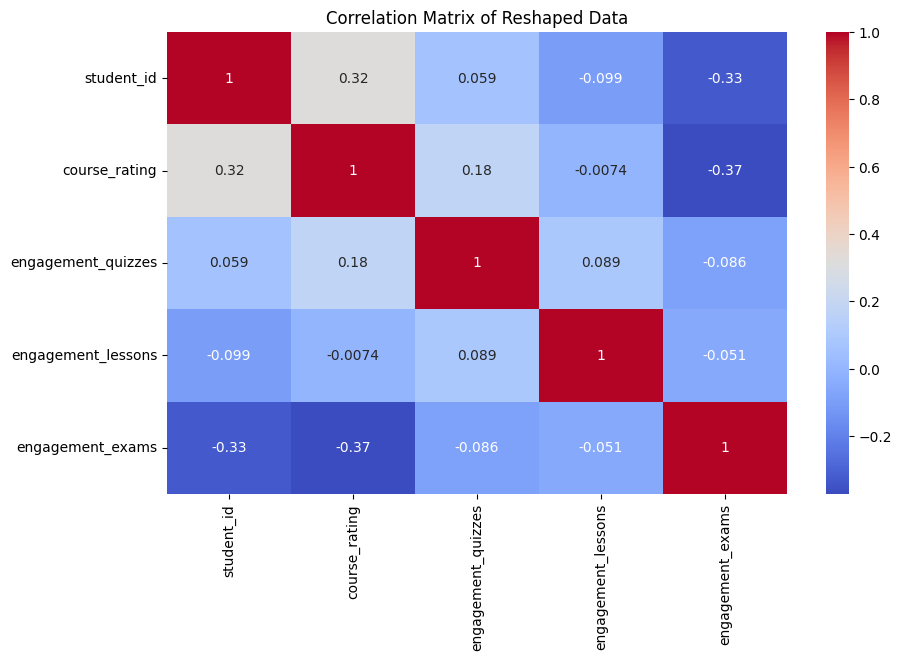

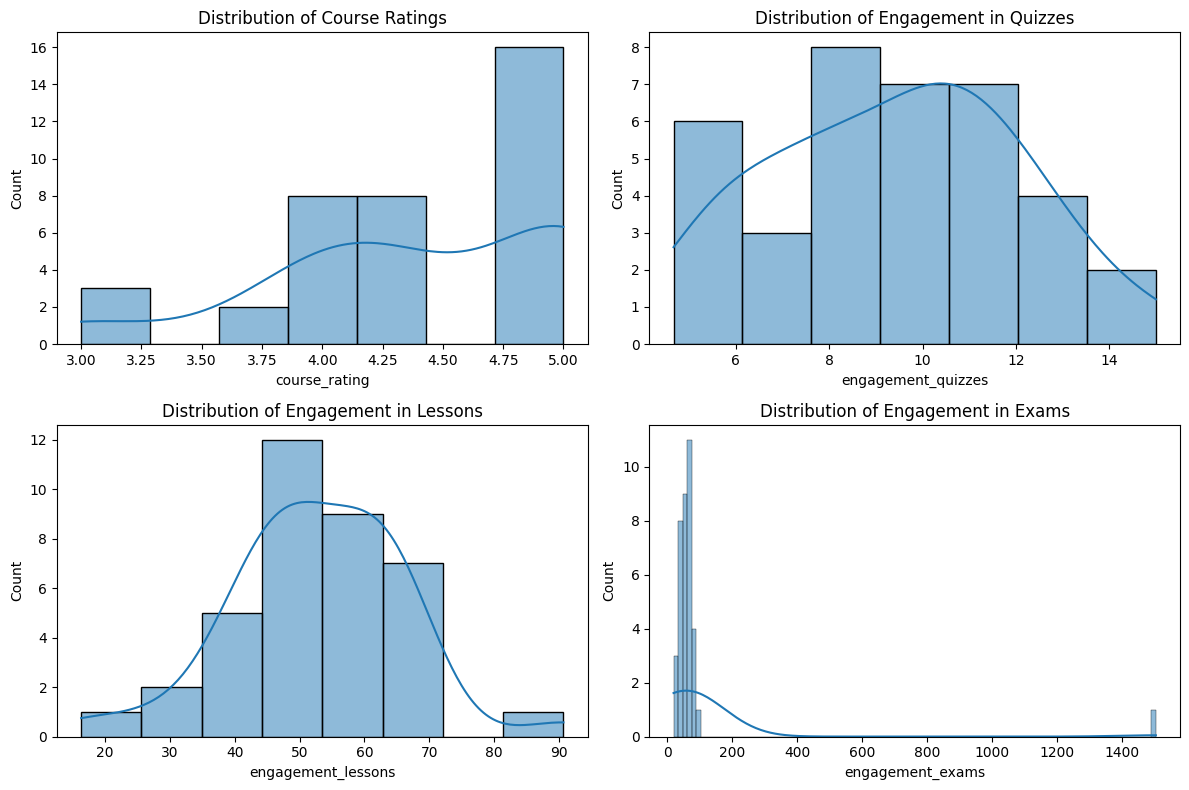

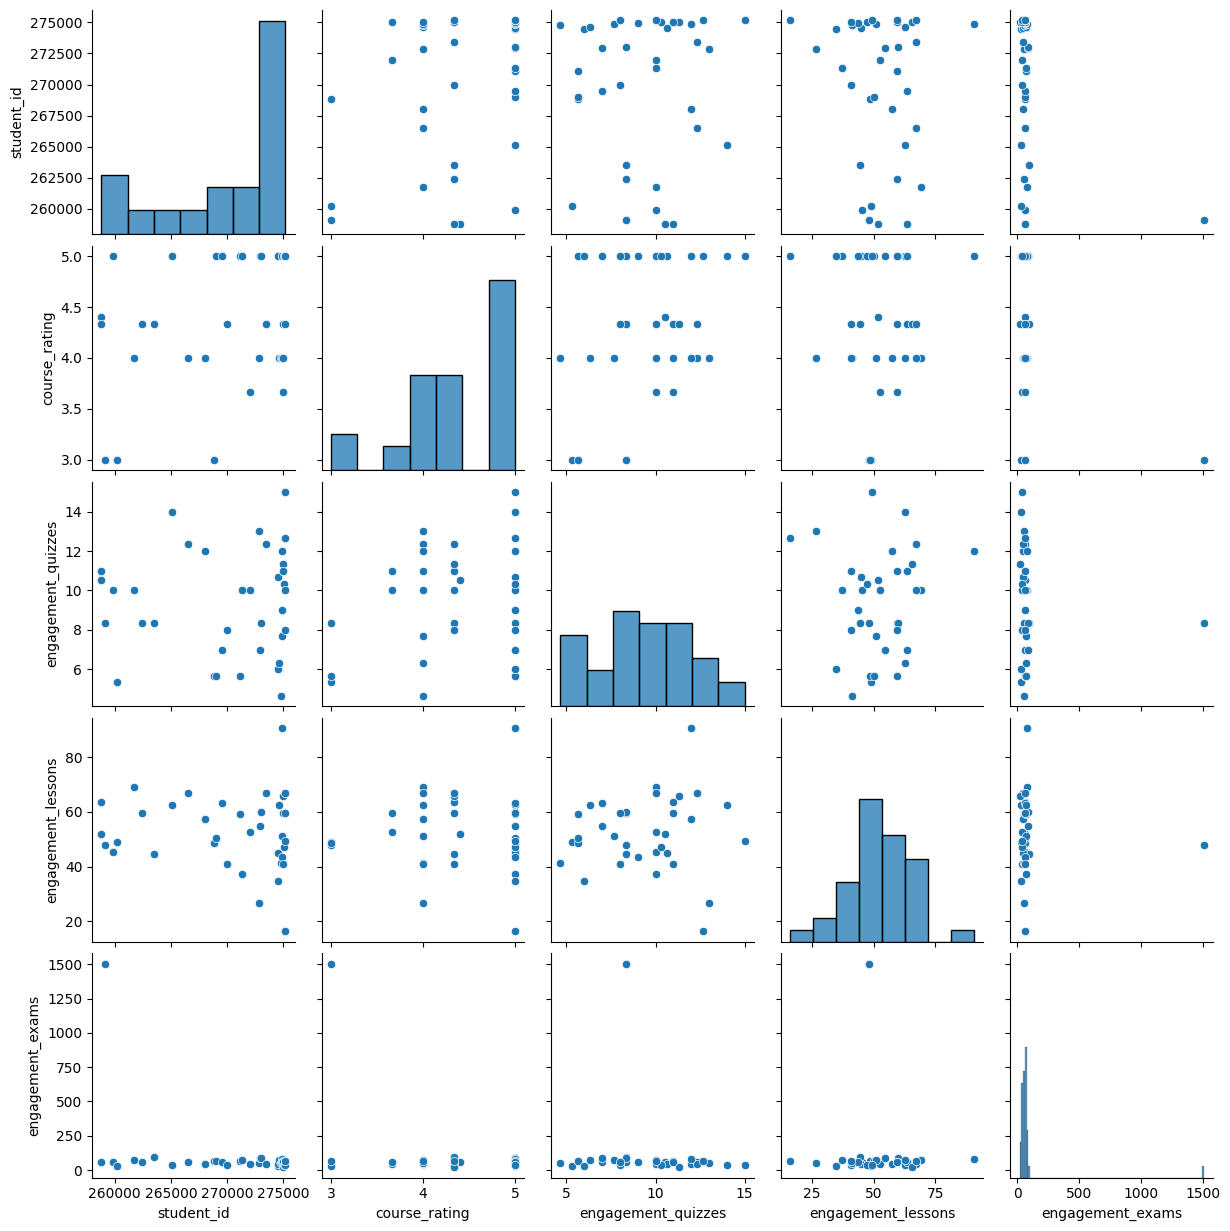

In [15]:
# prompt: using the reshaped data visualized using python

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the reshaped data
plt.figure(figsize=(10, 6))
sns.heatmap(reshaped_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Reshaped Data')
plt.show()

# Create individual plots for each feature
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(reshaped_data['course_rating'], kde=True)
plt.title('Distribution of Course Ratings')

plt.subplot(2, 2, 2)
sns.histplot(reshaped_data['engagement_quizzes'], kde=True)
plt.title('Distribution of Engagement in Quizzes')

plt.subplot(2, 2, 3)
sns.histplot(reshaped_data['engagement_lessons'], kde=True)
plt.title('Distribution of Engagement in Lessons')

plt.subplot(2, 2, 4)
sns.histplot(reshaped_data['engagement_exams'], kde=True)
plt.title('Distribution of Engagement in Exams')

plt.tight_layout()
plt.show()

# Pairplot for visualizing relationships between features
sns.pairplot(reshaped_data)
plt.show()

 then Understanding the datasets.

In [16]:
from google.colab import drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import os

drive.mount('/content/drive')

# Correct file path after mounting to /content/drive
url = "/content/drive/MyDrive/engagement .csv"
# Check if the file exists
if os.path.exists(url):
  df = pd.read_csv(url)
else:
  print(f"File not found at: {url}")
  # Print the contents of your Google Drive to help find the correct path
  !ls "/content/drive/MyDrive/"

# Display basic information about the dataset
print("\nDataset Information:")
print(df.info())  # Provides data types, non-null values, etc.
print("\nDescriptive Statistics:")
print(df.describe())  # Summary statistics for numerical columns

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())  # Count of missing values in each column

# Explore unique values in categorical columns (if any)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
  print(f"\nUnique values in '{col}':")
  print(df[col].unique())
  print(df[col].value_counts()) # Count of each unique value

# Analyze relationships between features (if needed, based on your specific objectives)
# For example, if 'engagement_score' is your target variable:
# print("\nCorrelation with Engagement Score:")
# print(df.corr()['engagement_score'].sort_values(ascending=False)) # Changed 'engagement' to 'engagement

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   course_title        140 non-null    object 
 1   student_id          138 non-null    float64
 2   course_rating       138 non-null    float64
 3   engagement_quizzes  138 non-null    float64
 4   engagement_lessons  138 non-null    float64
 5   engagement_exams    138 non-null    float64
dtypes: float64(5), object(1)
memory usage: 6.8+ KB
None

Descriptive Statistics:
          student_id  course_rating  engagement_quizzes  engagement_lessons  \
count     138.000000     138.000000          138.000000          138.000000   
mean   267849.782609       4.405797            9.637681           52.637681   
std      6787.882663       0.83393

Most machine learning algorithms are designed to work with numerical data.  then we need to convert the data to numerical format. using one hot encoding

In [17]:
# prompt: now concert the categorical data to numerical format

# ... (Your existing code)

# Convert categorical features to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['course_title', 'student_id'], drop_first=True)

# Display the updated DataFrame with numerical features
print("\nDataFrame with Numerical Features:")
print(df.head())

# Now you can proceed with your machine learning model training
# ... (rest of your code)


DataFrame with Numerical Features:
   course_rating  engagement_quizzes  engagement_lessons  engagement_exams  \
0            4.0                12.0                23.0              23.0   
1            5.0                 2.0                34.0              23.0   
2            4.0                13.0                12.0              45.0   
3            5.0                15.0                23.0              67.0   
4            3.0                 7.0                67.0              89.0   

   course_title_Introduction to Tableau  \
0                                  True   
1                                  True   
2                                  True   
3                                  True   
4                                  True   

   course_title_The Complete Data Visualization Course with Python, R, Tableau, and Excel  \
0                                              False                                        
1                                              Fal

In [18]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
# Remove extra spaces from column names
columns_features = ['course_rating', 'engagement_quizzes', 'engagement_lessons', 'engagement_exams']
# Notice the removal of leading and trailing spaces in the above line


encoder = OneHotEncoder(sparse_output=False) # Changed 'sparse' to 'sparse_output'


encoded_features = encoder.fit_transform(df[columns_features])


encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(columns_features))


df_final = pd.concat([df.drop(columns=columns_features), encoded_df], axis=1)
df_final.head()

,course_title_Introduction to Tableau,"course_title_The Complete Data Visualization Course with Python, R, Tableau, and Excel",student_id_258803.0,student_id_259098.0,student_id_259884.0,student_id_260192.0,student_id_261756.0,student_id_262412.0,student_id_263494.0,student_id_265101.0,...,engagement_exams_86.0,engagement_exams_87.0,engagement_exams_89.0,engagement_exams_90.0,engagement_exams_91.0,engagement_exams_95.0,engagement_exams_97.0,engagement_exams_98.0,engagement_exams_4353.0,engagement_exams_nan
0,True,False,False,False,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,True,False,False,False,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,True,False,False,False,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,True,False,False,False,False,False,False,False,False,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,True,False,False,False,False,False,False,False,False,False,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


correlation of the dataframe using Heat map. A correlation heatmap is a visual representation of a correlation matrix, where each cell represents the correlation coefficient between two variables. It's a powerful tool for understanding the relationships between different features in a dataset.

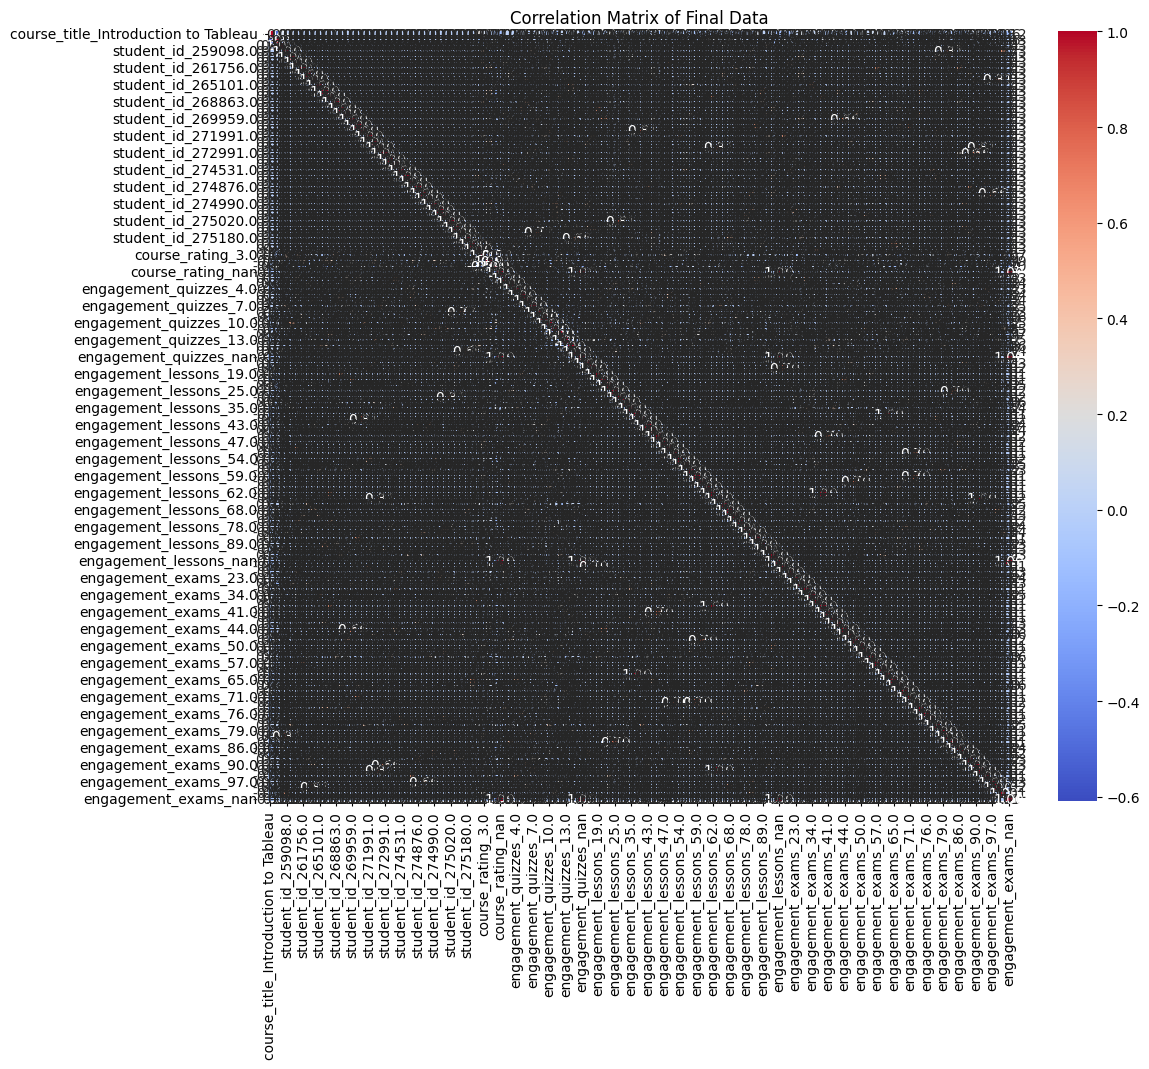

In [19]:
# prompt: correlation of the dataframe using Heat map. using python with the given datasets

plt.figure(figsize=(12, 10))
sns.heatmap(df_final.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Final Data')
plt.show()

we then model

In [20]:
# Encoding categorical variables
df = pd.get_dummies(df, drop_first=True)

Then split the data to X and Y

In [21]:

X = df.drop('engagement_quizzes', axis=1)
y = df['engagement_quizzes']

Then split the data to train and test

In [22]:
# prompt: Then split the data to train and test using sklearn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Time to train the Model

In [24]:
# prompt: now i want to start training the model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# Initialize and train the RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters

# Before fitting the model, handle NaN values in y_train
# You can either drop rows with NaN or impute them with a suitable value
# Here, we will drop rows with NaN for simplicity
# If 'engagement_quizzes' is your target column in df:
df = df.dropna(subset=['engagement_quizzes']) # drop rows in df where 'engagement_quizzes' is NaN

# Then re-split the data
X = df.drop('engagement_quizzes', axis=1)
y = df['engagement_quizzes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

now checking the mean squared accuracy. Mean Squared Error (MSE) is a common metric used to evaluate the performance of regression models. It measures the average squared difference between the predicted values and the actual values. A lower MSE indicates that the model's predictions are closer to the true values.

In [25]:
# prompt: now check the mean squared accuracy and the r squared

from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 22.142857142857142
R-squared: -0.42446869615163707


Check the model workbility with Live Data

In [26]:
live_data = pd.DataFrame({
    'course_rating': [4.5],
   'engagement_quizzes': [0.5],
    'engagement_lessons': [0.8],
    'engagement_exams': [0.9],
    # ... other features as needed (make sure to match the columns in your model)
    # Include all features used for training
})

# Ensure the live data has the same columns as the training data and in the same order
live_data = live_data.reindex(columns=X.columns, fill_value=0)  # Important to fill missing columns

# Preprocess the live data (one-hot encoding, etc.) the same way you did for the training data
live_data = pd.get_dummies(live_data, drop_first=True)

# Align columns of live data with training data
live_data = live_data.reindex(columns=X.columns, fill_value=0)


# Make predictions
live_predictions = rf_classifier.predict(live_data)

print(f"Live Predictions: {live_predictions}")

Live Predictions: [9.]


Validation of the Data live data

In [27]:
# prompt: now validate the lice data

# Check if 'live_data' DataFrame exists and has the necessary columns
if 'live_data' in locals() and all(col in live_data.columns for col in X.columns):
    # Preprocess live data
    live_data_encoded = pd.get_dummies(live_data, drop_first=True)
    live_data_aligned = live_data_encoded.reindex(columns=X.columns, fill_value=0)

    # Make predictions
    live_predictions = rf_classifier.predict(live_data_aligned)
    print("Live Data Predictions:", live_predictions)
else:
    print("Error: 'live_data' DataFrame not found or missing required columns.")
    print("Required Columns:", X.columns)

Live Data Predictions: [9.]


now want my model to receive input from the user(lecture) and give prediction through the student ID

In [16]:
import pandas as pd  # Make sure pandas is imported

# Load the DataFrame from Google Drive
df = pd.read_csv('/content/drive/My Drive/engagement .csv')  # Ensure there are no spaces in the filename

# Welcome message
print("Hello Mwalimu, welcome to the Student Engagement Tracking AI Agent.")
print("The model helps you to track students' engagement in lessons, quizzes, and exams.")
print("Just input the student ID to get started.\n")

# Function to get student information
def get_student_info(student_id, df):
    try:
        student_data = df[df['student_id'] == student_id]
        if not student_data.empty:
            course_rating = student_data['course_rating'].iloc[0]
            engagement_quizzes = student_data['engagement_quizzes'].iloc[0]
            engagement_lessons = student_data['engagement_lessons'].iloc[0]
            engagement_exams = student_data['engagement_exams'].iloc[0]

            print(f"\nStudent ID: {student_id}")
            print(f"Course Rating: {course_rating}")
            print(f"Engagement Quizzes: {engagement_quizzes}")
            print(f"Engagement Lessons: {engagement_lessons}")
            print(f"Engagement Exams: {engagement_exams}")

            # Create a DataFrame for prediction
            live_data = pd.DataFrame({
                'course_rating': [course_rating],
                'engagement_quizzes': [engagement_quizzes],
                'engagement_lessons': [engagement_lessons],
                'engagement_exams': [engagement_exams],
            })
            live_data = live_data.reindex(columns=X.columns, fill_value=0)
            live_data = pd.get_dummies(live_data, drop_first=True)
            live_data = live_data.reindex(columns=X.columns, fill_value=0)

            live_predictions = rf_classifier.predict(live_data)
            print(f"Predicted Engagement Quizzes: {live_predictions[0]}")

        else:
            print(f"Student with ID '{student_id}' not found in the dataset.")
    except KeyError as e:
        print(f"Error: Column '{e}' not found in the DataFrame. Please check your data.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Prompt the user to input a student ID
try:
    student_id = int(input("Please enter the student ID: "))  # Convert input to integer
    get_student_info(student_id, df)  # Call the function with the user input
except ValueError:
    print("Invalid input. Please enter a valid student ID (numeric).")

Hello Mwalimu, welcome to the Student Engagement Tracking AI Agent.
The model helps you to track students' engagement in lessons, quizzes, and exams.
Just input the student ID to get started.

Please enter the student ID: 272907

Student ID: 272907
Course Rating: 5.0
Engagement Quizzes: 7.0
Engagement Lessons: 34.0
Engagement Exams: 78.0
An error occurred: name 'X' is not defined


another test to the model

In [17]:
import pandas as pd  # Make sure pandas is imported

# Load the DataFrame from Google Drive
df = pd.read_csv('/content/drive/My Drive/engagement .csv')  # Ensure there are no spaces in the filename

# Welcome message
print("Hello Mwalimu, welcome to the Student Engagement Tracking AI Agent.")
print("The model helps you to track students' engagement in lessons, quizzes, and exams.")
print("Just input the student ID to get started.\n")

# Function to get student information
def get_student_info(student_id, df):
    try:
        student_data = df[df['student_id'] == student_id]
        if not student_data.empty:
            course_rating = student_data['course_rating'].iloc[0]
            engagement_quizzes = student_data['engagement_quizzes'].iloc[0]
            engagement_lessons = student_data['engagement_lessons'].iloc[0]
            engagement_exams = student_data['engagement_exams'].iloc[0]

            print(f"\nStudent ID: {student_id}")
            print(f"Course Rating: {course_rating}")
            print(f"Engagement Quizzes: {engagement_quizzes}")
            print(f"Engagement Lessons: {engagement_lessons}")
            print(f"Engagement Exams: {engagement_exams}")

            # Create a DataFrame for prediction
            live_data = pd.DataFrame({
                'course_rating': [course_rating],
                'engagement_quizzes': [engagement_quizzes],
                'engagement_lessons': [engagement_lessons],
                'engagement_exams': [engagement_exams],
            })
            live_data = live_data.reindex(columns=X.columns, fill_value=0)
            live_data = pd.get_dummies(live_data, drop_first=True)
            live_data = live_data.reindex(columns=X.columns, fill_value=0)

            live_predictions = rf_classifier.predict(live_data)
            print(f"Predicted Engagement Quizzes: {live_predictions[0]}")

        else:
            print(f"Student with ID '{student_id}' not found in the dataset.")
    except KeyError as e:
        print(f"Error: Column '{e}' not found in the DataFrame. Please check your data.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Prompt the user to input a student ID
try:
    student_id = int(input("Please enter the student ID: "))  # Convert input to integer
    get_student_info(student_id, df)  # Call the function with the user input
except ValueError:
    print("Invalid input. Please enter a valid student ID (numeric).")

Hello Mwalimu, welcome to the Student Engagement Tracking AI Agent.
The model helps you to track students' engagement in lessons, quizzes, and exams.
Just input the student ID to get started.

Please enter the student ID: 258800

Student ID: 258800
Course Rating: 5.0
Engagement Quizzes: 15.0
Engagement Lessons: 25.0
Engagement Exams: 34.0
An error occurred: name 'X' is not defined


Now saving the model

In [25]:
from google.colab import drive
drive.mount('/content/gdrive')
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Generate some dummy data
x_train = np.random.rand(1000, 10)
y_train = np.random.randint(0, 2, size=(1000, 1))

# Create a simple model
model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(10,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5)
# Save the model in Keras H5 format
model.save('/content/gdrive/My Drive/my_model.h5')

# Alternatively, save in TensorFlow SavedModel format
# model.save('/content/gdrive/My Drive/my_model_directory')
# Load the model from Keras H5 format
loaded_model = keras.models.load_model('/content/gdrive/My Drive/my_model.h5')

# Alternatively, load from TensorFlow SavedModel format
# loaded_model = keras.models.load_model('/content/gdrive/My Drive/my_model_directory')
# Generate some new dummy data for prediction
x_new = np.random.rand(5, 10)

# Make predictions
predictions = loaded_model.predict(x_new)
print(predictions)

Mounted at /content/gdrive
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5215 - loss: 0.7250
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5193 - loss: 0.6967
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5384 - loss: 0.6901
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5454 - loss: 0.6920
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5132 - loss: 0.6949


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
[[0.46246696]
 [0.4881638 ]
 [0.5260933 ]
 [0.5059416 ]
 [0.46122536]]
